In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import multiprocessing

In [2]:
#chunksize = 10 ** 2
#for chunk in pd.read_csv("part-00000", chunksize=chunksize):
#    process(chunk)

df = pd.read_csv("part-00000", header=None)
df.columns = header = ["label", "total_pixels", "x_pixels", "y_pixels",
              "integrated_intensity", "brightest_pixel", "brightest_pixel_x", "brightest_pixel_y",
              "brightest_pixel_RA", "brightest_pixel_DEC", "center_of_mass_x", "center_of_mass_y",
              "center_of_mass_RA", "center_of_mass_DEC", "center_of_gaus_fit_x", "center_of_gaus_fit_y",
              "center_of_gaus_fit_RA", "center_of_gaus_fit_DEC", "fit_x_axis", "fit_y_axis", "fit_theta",
              "deconv_x", "deconv_y", "integrated_intensity_fit", "ratio_residual"
             ]

In [3]:
df.head()

,label,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,...,center_of_gaus_fit_y,center_of_gaus_fit_RA,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual
0,P191+55_0,43,7,7,0.961113,0.001262,13,4195,194.549648,54.808582,...,4195.168076,194.549824,54.808648,1.719762,1.896624,-0.532125,0.632697,1.986707,0.971715,0.020838
1,P191+55_1,20,5,7,0.326739,0.000757,27,4605,194.552204,54.979509,...,4603.736197,194.550798,54.979016,1.519696,1.080088,0.057949,0.000000,0.000000,0.330021,0.193748
2,P191+55_2,45,7,8,0.745168,0.000793,32,3745,194.522178,54.621587,...,3745.225610,194.522008,54.621685,2.200384,1.810055,-0.030495,3.293634,1.472301,0.761027,0.051990
3,P191+55_3,43,7,10,0.702810,0.000809,33,3775,194.522370,54.634094,...,3775.203413,194.522306,54.634180,2.116900,1.720535,-1.515302,2.974798,0.644257,0.705155,0.082425
4,P191+55_4,74,9,14,1.104583,0.000829,35,4346,194.538393,54.871832,...,4346.681491,194.539006,54.872101,3.113855,2.061816,-0.772094,6.145450,2.751914,1.080356,0.161090


In [4]:
df.describe()

,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,center_of_mass_x,...,center_of_gaus_fit_y,center_of_gaus_fit_RA,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual
count,2.291395e+06,2.291395e+06,2.291395e+06,2.287893e+06,2.287893e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.287893e+06,...,2.291395e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.291376e+06,2.291395e+06,2.291395e+06,2.287874e+06,2.287874e+06
mean,6.651996e+01,8.456417e+00,9.585996e+00,5.787243e+00,3.542601e-03,4.635848e+03,4.615950e+03,1.836146e+02,4.961020e+01,4.636599e+03,...,4.615308e+03,1.836143e+02,4.960993e+01,2.698754e+00,2.442680e+00,1.883929e+05,4.120140e+00,3.280719e+00,5.629903e+00,1.338380e-01
std,2.792838e+02,7.538168e+00,8.346169e+00,1.076074e+02,6.333568e-02,2.370613e+03,2.341016e+03,5.006163e+01,6.970451e+00,2.368919e+03,...,2.341008e+03,5.006162e+01,6.970451e+00,3.358408e+00,3.253817e+00,2.851926e+08,8.434384e+00,8.199732e+00,1.183866e+02,1.139827e-01
min,0.000000e+00,1.000000e+00,2.000000e+00,1.072606e-01,1.792818e-04,2.000000e+00,2.000000e+00,8.101492e-04,2.373915e+01,3.347199e+00,...,2.000000e+00,5.978147e-04,2.373875e+01,0.000000e+00,0.000000e+00,-2.546275e+07,0.000000e+00,0.000000e+00,-2.242559e+02,0.000000e+00
25%,2.200000e+01,5.000000e+00,6.000000e+00,2.838947e-01,4.333725e-04,2.750000e+03,2.744000e+03,1.609147e+02,4.475846e+01,2.752312e+03,...,2.743100e+03,1.609144e+02,4.475827e+01,1.698905e+00,1.470607e+00,-3.780023e-01,7.019222e-02,0.000000e+00,2.882057e-01,6.305293e-02
50%,3.200000e+01,7.000000e+00,7.000000e+00,4.806141e-01,5.940558e-04,4.600000e+03,4.591000e+03,1.885275e+02,4.981468e+01,4.600855e+03,...,4.590526e+03,1.885272e+02,4.981436e+01,1.953602e+00,1.798292e+00,4.839647e-03,2.272337e+00,1.390069e+00,4.867923e-01,9.710809e-02
75%,5.500000e+01,9.000000e+00,1.000000e+01,1.072997e+00,1.006330e-03,6.477000e+03,6.433000e+03,2.168046e+02,5.529788e+01,6.476035e+03,...,6.432835e+03,2.168046e+02,5.529768e+01,2.543931e+00,2.190612e+00,3.854843e-01,4.459382e+00,3.257315e+00,1.079813e+00,1.628680e-01
max,1.961310e+05,1.708000e+03,1.000000e+03,6.458131e+04,4.572484e+01,1.080700e+04,1.078300e+04,3.599989e+02,6.200953e+01,1.080586e+04,...,1.078279e+04,3.599991e+02,6.200928e+01,1.708000e+03,7.320000e+02,4.317043e+11,4.022031e+03,1.723724e+03,6.168559e+04,1.821283e+00


In [5]:
data_for_hist = ['total_pixels', 'integrated_intensity', 'brightest_pixel', 'fit_x_axis', 'fit_y_axis', 'deconv_x', 'deconv_y', 'integrated_intensity_fit', 'ratio_residual']
data = df[data_for_hist]
#sns.pairplot(data)

Text(0, 0.5, 'Counts')

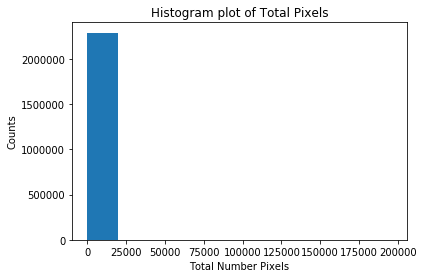

In [6]:
plt.hist(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

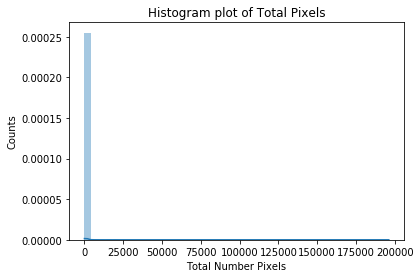

In [7]:
sns.distplot(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

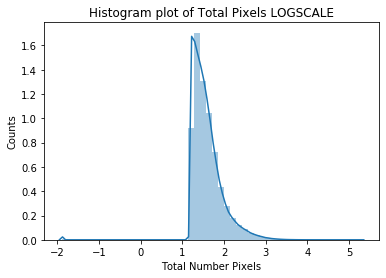

In [8]:
df.loc[df.total_pixels == 0, 'total_pixels'] = min(df.loc[df.total_pixels > 0].total_pixels)/1000
sns.distplot(np.log10(df.total_pixels))
plt.title('Histogram plot of Total Pixels LOGSCALE')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

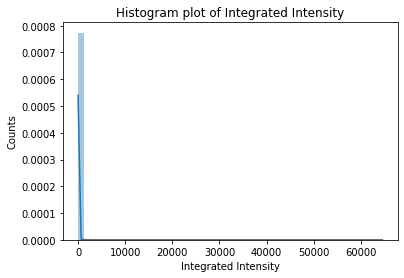

In [9]:
sns.distplot(df.integrated_intensity)
plt.title('Histogram plot of Integrated Intensity')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

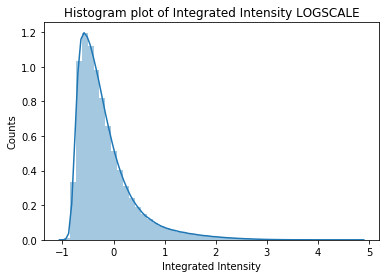

In [10]:
sns.distplot(np.log10(df.integrated_intensity))
plt.title('Histogram plot of Integrated Intensity LOGSCALE')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

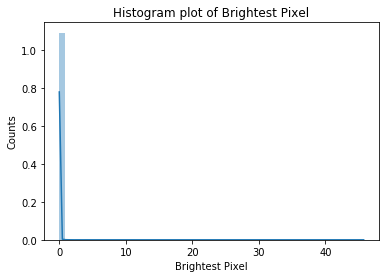

In [11]:
sns.distplot(df.brightest_pixel)
plt.title('Histogram plot of Brightest Pixel')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

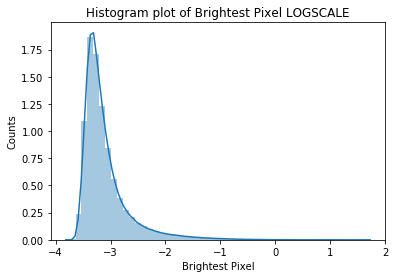

In [12]:
sns.distplot(np.log10(df.brightest_pixel))
plt.title('Histogram plot of Brightest Pixel LOGSCALE')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

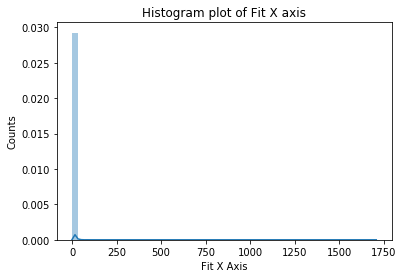

In [13]:
sns.distplot(df.fit_x_axis)
plt.title('Histogram plot of Fit X axis')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

In [14]:
df.loc[df.fit_x_axis==0.0, 'fit_x_axis'] =1.0e-8  ## Some values are 0 implying log (0) = inf. So it replaced by a finite value 1000 times less than the minimum value

Text(0, 0.5, 'Counts')

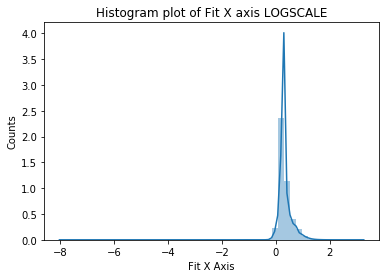

In [15]:
sns.distplot(np.log10(df.fit_x_axis))
plt.title('Histogram plot of Fit X axis LOGSCALE')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

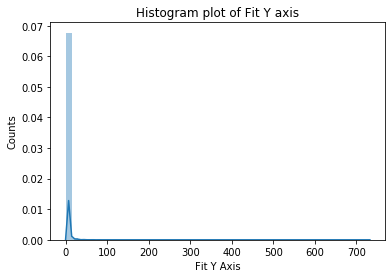

In [16]:
sns.distplot(df.fit_y_axis)
plt.title('Histogram plot of Fit Y axis')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

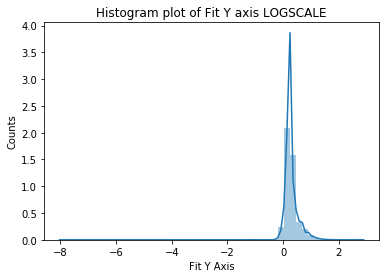

In [17]:
df.loc[df.fit_y_axis==0.0, 'fit_y_axis'] =1.0e-8 
sns.distplot(np.log10(df.fit_y_axis))
plt.title('Histogram plot of Fit Y axis LOGSCALE')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

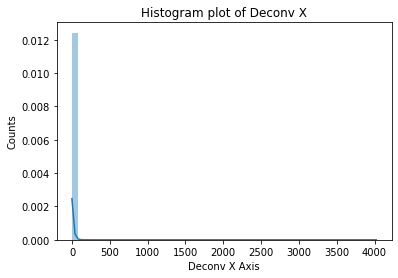

In [18]:
sns.distplot(df.deconv_x)
plt.title('Histogram plot of Deconv X')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

In [19]:
df.loc[df.deconv_x == 0, 'deconv_x'] = 1.0e-8

Text(0, 0.5, 'Counts')

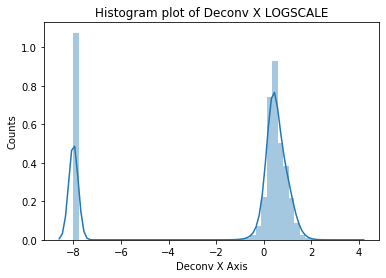

In [20]:
sns.distplot(np.log10(df.deconv_x))
plt.title('Histogram plot of Deconv X LOGSCALE')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

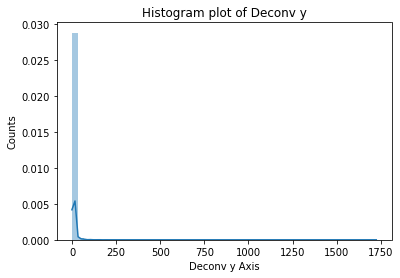

In [21]:
sns.distplot(df.deconv_y)
plt.title('Histogram plot of Deconv y')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

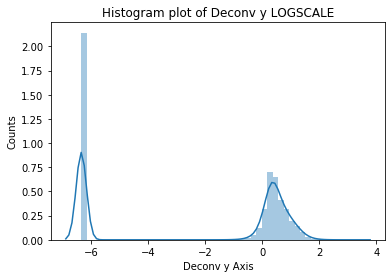

In [22]:
df.loc[df.deconv_y == 0, 'deconv_y'] = min(df.loc[df.deconv_y > 0, 'deconv_y'])/10000
sns.distplot(np.log10(df.deconv_y))
plt.title('Histogram plot of Deconv y LOGSCALE')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

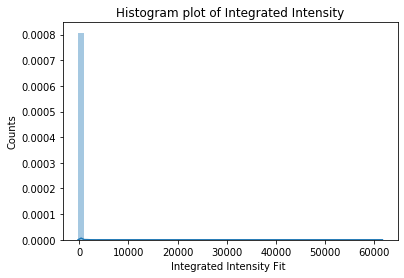

In [23]:
sns.distplot(df.integrated_intensity_fit)
plt.title('Histogram plot of Integrated Intensity')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

/home/s2681846/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Counts')

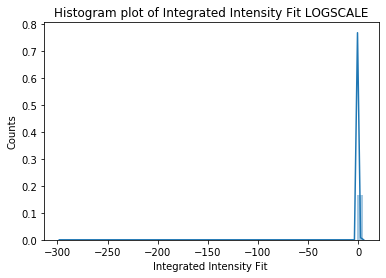

In [24]:
df.loc[df.integrated_intensity_fit == 0, 'integrated_intensity_fit'] = min(df.loc[df.integrated_intensity_fit > 0].integrated_intensity_fit)/1000
sns.distplot(np.log10(df.integrated_intensity_fit))
plt.title('Histogram plot of Integrated Intensity Fit LOGSCALE')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

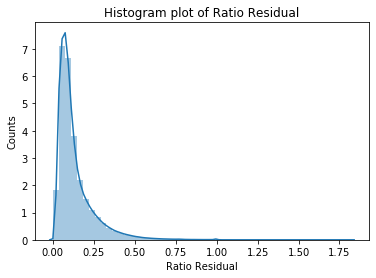

In [25]:
sns.distplot(df.ratio_residual)
plt.title('Histogram plot of Ratio Residual')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

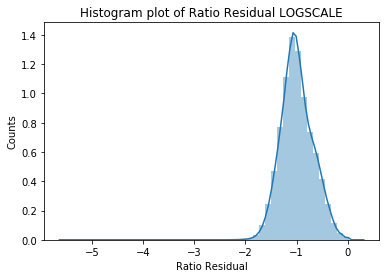

In [26]:
df.loc[df.ratio_residual == 0, 'ratio_residual'] = min(df.loc[df.ratio_residual > 0].ratio_residual)/1000

sns.distplot(np.log10(df.ratio_residual))
plt.title('Histogram plot of Ratio Residual LOGSCALE')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')